# Netflix Data Analysis

## Defining Problem Statement and Analysing basic metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Data Loading

In [2]:
df = pd.read_csv('D:/Workspace/Scaler/Jupyter Notebooks/Python Libraries/Pandas/netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Processing

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.select_dtypes(include='object').nunique()

show_id        8807
type              2
title          8807
director       4528
cast           7692
country         748
date_added     1767
rating           17
duration        220
listed_in       514
description    8775
dtype: int64

Observations
- Only one column is integer type (Release Year) and rest fields are String/Object type
- NULL values present in director, cast, country date_added column
- Unique values, Frequecny, mean values are visible, NaN is present due to data type

## Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [9]:
# Shape
df.shape

(8807, 12)

- Shape of the data - 12 columns and 8807 rows/indexes

In [10]:
# Data Type of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
# Checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
# Missig value detection

missing = pd.isna(df)
missing.sum()
# Checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
# Check Unique values
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [15]:
# Statistical Summary
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


- In statistical summary, we can see that there are several Null values that is because of String values in the dataframe
- approx. 30% null values present in director column

## Non-Graphical Analysis: Value counts and unique attributes

In [16]:
#df['title'].value_counts()
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

- As per data set most number of movies directed by Rajiv Chilaka

In [17]:
# Unique value counts
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Check for duplicate values

In [18]:

df.duplicated().sum()

0

- Unique values are present
- No duplicate values are present

### Working with dates

In [19]:
# Date Time format
df['date_added'] = pd.to_datetime(df['date_added'], dayfirst=True, errors='coerce')
df['date_added'] = df['date_added'].astype(str).str.replace(',', '').str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], format="%Y-%m-%d")

df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [20]:
# Update NaN values of date_added field using mode function and convert new date related column to integer
df['day_added'].fillna(df['day_added'].mode()[0], inplace = True)
df['day_added'] = df['day_added'].astype(int)

df['month_added'].fillna(df['month_added'].mode()[0], inplace = True)
df['month_added'] = df['month_added'].astype(int)

df['year_added'].fillna(df['year_added'].mode()[0], inplace = True)
df['year_added'] = df['year_added'].astype(int)

In [21]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021


- date_added column separated with day, month and year respectively

### Number of Movies/TV Shows available in US

In [22]:
df.loc[df['country'] == 'United States']['type'].value_counts()

type
Movie      2058
TV Show     760
Name: count, dtype: int64

### Number of Movies/TV Shows available in India

In [23]:
df.loc[df['country'] == 'India']['type'].value_counts()

type
Movie      893
TV Show     79
Name: count, dtype: int64

### Year wise count of of Movies and TV Shows visible on Netflix

In [24]:
# df.loc[df['year_added'] == 2020]['type']
a = df.groupby('year_added')[['type']].agg({'type':['count']})
a.columns =["_".join(col) for col in a.columns]
a

,type_count
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,10
2014,23
2015,73
2016,418


In [25]:
a.reset_index()

,year_added,type_count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,10
6,2014,23
7,2015,73
8,2016,418
9,2017,1164


-  Number of Movies increasing after 2018 and decresing after 2019, specially in 2020. Probably due to COVID

In [26]:
df.loc[df['type']=='TV Show']['date_added'].dt.month

1        9.0
2        9.0
3        9.0
4        9.0
5        9.0
        ... 
8795     5.0
8796     1.0
8797     9.0
8800    12.0
8803     7.0
Name: date_added, Length: 2676, dtype: float64

### Year wise count of Movies/TV Shows for each directors

In [27]:
dirr = df.groupby("director")[["year_added","type"]].agg({"year_added":["min","max"],
                                                     "type":['count']})

In [28]:
dirr.columns
dirr.columns =["_".join(col) for col in dirr.columns]

In [29]:
dirr.reset_index(inplace=True)

In [30]:
dirr

,director,year_added_min,year_added_max,type_count
0,A. L. Vijay,2018,2019,2
1,A. Raajdheep,2020,2020,1
2,A. Salaam,2017,2017,1
3,A.R. Murugadoss,2018,2019,2
4,Aadish Keluskar,2019,2019,1
...,...,...,...,...
4523,Çagan Irmak,2018,2018,1
4524,Ísold Uggadóttir,2019,2019,1
4525,Óskar Thór Axelsson,2018,2018,1
4526,Ömer Faruk Sorak,2018,2021,2


In [31]:
dirr.sort_values(by=['type_count'], ascending = False)

,director,year_added_min,year_added_max,type_count
3392,Rajiv Chilaka,2019,2021,19
3443,"Raúl Campos, Jan Suter",2016,2018,18
4046,Suhas Kadav,2017,2021,16
2598,Marcus Raboy,2016,2020,16
1790,Jay Karas,2014,2020,14
...,...,...,...,...
2049,Jos Humphrey,2020,2020,1
2050,Jose Gomez,2021,2021,1
2051,Jose Javier Reyes,2021,2021,1
2053,"Joseduardo Giordano, Sergio Goyri Jr.",2018,2018,1


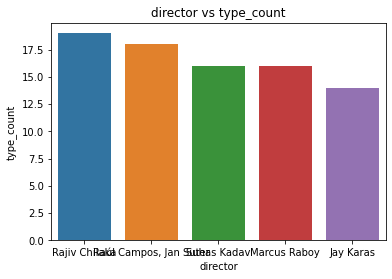

In [32]:
sb.barplot(data = dirr.sort_values(by=['type_count'], ascending = False).head(), x='director', y='type_count')
plt.title('director vs type_count')
plt.show()

- Top 5 directors with most number of movies/TV Shows from stating to latest dated year respectively

### Monthly added Movies/TV Shows

In [33]:
monthly = df.groupby("month_added")[["type"]].agg({"type":['count']})

In [34]:
monthly

,type
,count
month_added,
1,727
2,557
3,734
4,759
5,626
6,724
7,917
8,749


In [35]:
monthly.columns =["_".join(col) for col in monthly.columns]

In [36]:
monthly = monthly.reset_index()

In [37]:
monthly.sort_values(by = ['type_count'], ascending=False)

,month_added,type_count
6,7,917
11,12,797
8,9,765
3,4,759
9,10,755
7,8,749
2,3,734
0,1,727
5,6,724
10,11,697


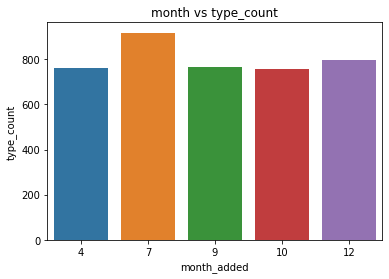

In [38]:
sb.barplot(data = monthly.sort_values(by=['type_count'], ascending = False).head(), x='month_added', y='type_count')
plt.title('month vs type_count')
plt.show()

- August is the Month when most Movies/TV Shows added on the netflix, followed by December and Septhember

### Total number of Movies and TV Shows added on Netflix (On Year basis)

In [39]:
t1 = df.groupby(["type", "year_added"])['type'].count()

In [40]:
t1 = t1.to_frame()

In [41]:
# t1.columns =["_".join(col) for col in t1.columns]
# t1.reset_index()
t1.rename(columns={'type':'type_count'}, inplace=True)

In [42]:
t1 = t1.reset_index()

In [43]:
t1.columns

Index(['type', 'year_added', 'type_count'], dtype='object')

In [44]:
t1_pivot = pd.pivot(t1, index = 'type',
                   columns = 'year_added',
                   values = 'type_count')
t1_pivot

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1.0,2.0,1.0,13.0,3.0,6.0,19.0,56.0,253.0,839.0,1237.0,1424.0,1284.0,993.0
TV Show,1.0,NaN,NaN,NaN,NaN,4.0,4.0,17.0,165.0,325.0,388.0,673.0,594.0,505.0


- We can get a insight that TV Show count is increasing by year on year basis

### Working with Nested data
### Fetching top Genres

In [45]:
df.listed_in # comma seperated value

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [46]:
df_remove_comma = df.listed_in.str.split(',', expand=True)

In [47]:
df_remove_comma # Comma removed

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [48]:
#remove listed in from df
df = df.drop(['listed_in'], axis = 1)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021


In [49]:
# Combine splitted data
df_new = pd.concat([df,df_remove_comma], axis=1)

In [50]:
df_new.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,International TV Shows,TV Dramas,TV Mysteries


In [51]:
# Use melt to convert into long format frpom wide format
df_melt = pd.melt(df_new, id_vars = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating',
                                   'duration', 'description', 'day_added', 'month_added', 'year_added'],
                var_name = 'listed_total', value_name = 'listed_in')

In [52]:
df_melt.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added,listed_total,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021,0,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,0,International TV Shows


In [53]:
# Analysis

df2 = df_melt.groupby(['listed_in'])['title'].nunique()

In [54]:
# TOP 5 GENRE 
df_final = df2.sort_values(ascending=False).head()
df_final

listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: title, dtype: int64

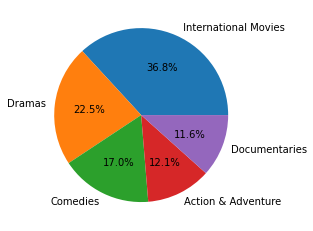

In [55]:
plt.pie(df_final.head().values, labels = df_final.head().index, autopct = '%1.1f%%')
plt.show()

## Visual Analysis - Univariate, Bivariate after pre-processing of the data
   #### Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

    A. For continuous variable(s): Distplot, countplot, histogram for univariate analysis

    B. For categorical variable(s): Boxplot 

    C. For correlation: Heatmaps, Pairplots

In [56]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,24,9,2021


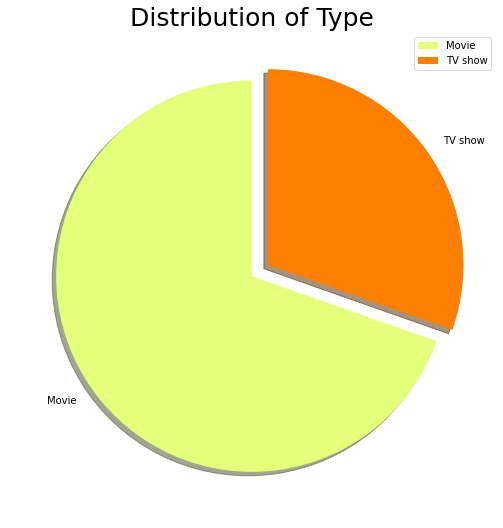

In [57]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

- As per recorded data, Netflix mostly focused on Movies and Movies are the marjoty revenuw generator for netflix

Text(0.5, 1.0, 'Rating')

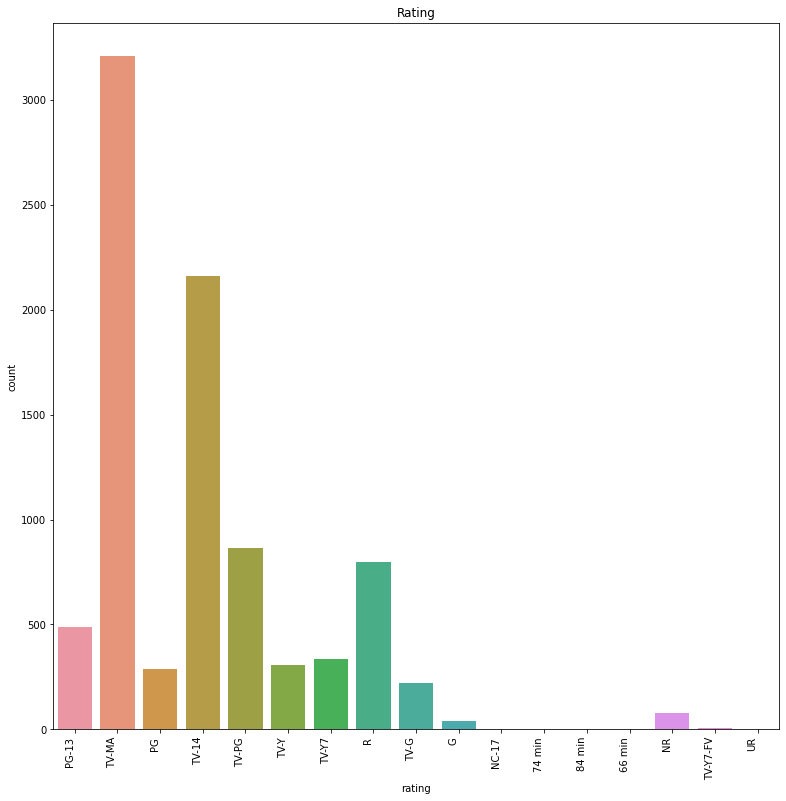

In [58]:
sb.countplot(x = df['rating'])
sb.countplot(x = df['rating']).set_xticklabels(sb.countplot(x = df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

- Most highest giving rating is TV-MA

Text(0.5, 1.0, 'Type')

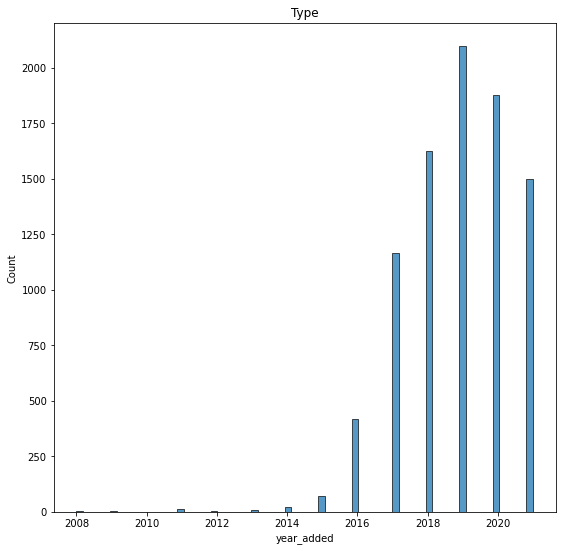

In [59]:
# Histplot

sb.histplot(df['year_added'])
fig = plt.gcf()
plt.title('Type')

- Highest number of movie/TV Show was added into Netflix between 2018-2020 
- After 2019 there are some downfall, Number of new Movies/TV Shows decresing since 2019

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\3008557954.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb.histplot(x = df['rating']).set_xticklabels(sb.histplot(x = df['rating']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Rating')

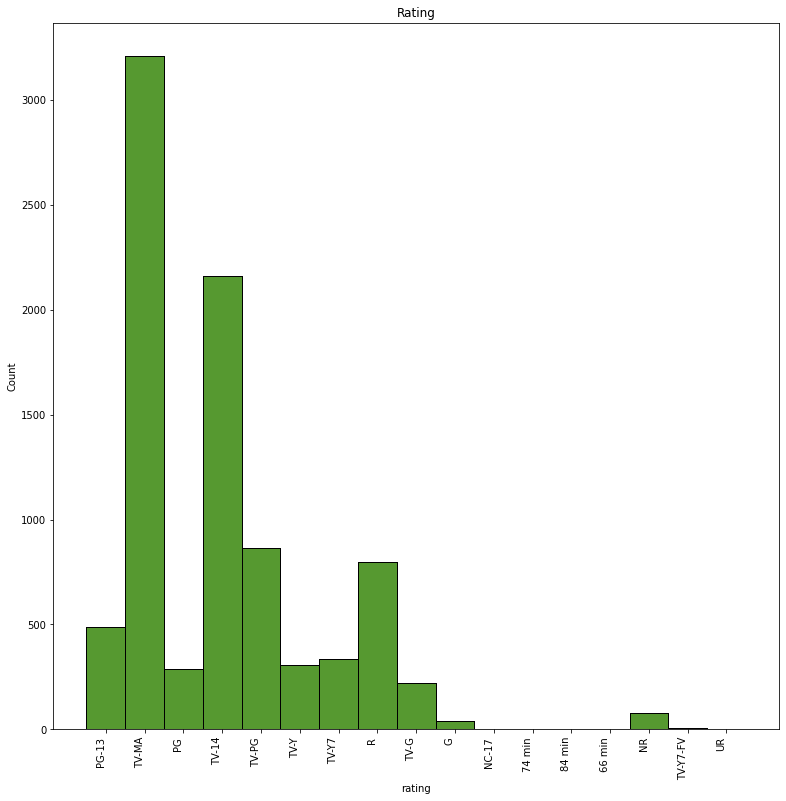

In [60]:
sb.histplot(x = df['rating'])
sb.histplot(x = df['rating']).set_xticklabels(sb.histplot(x = df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

### Relation between type and rating

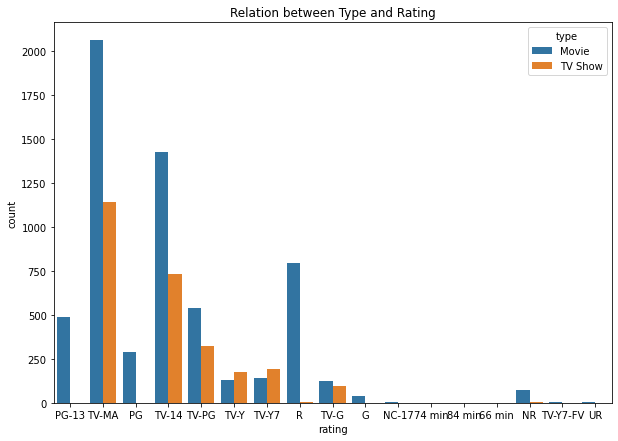

In [61]:
plt.figure(figsize=(10,7))
sb.countplot(x='rating', hue = 'type', data = df)
plt.title('Relation between Type and Rating')
plt.show()

- TV Shows are the Highest rated shows on Netflix. Hence, we can concluded that viewers love to watch TV Shows

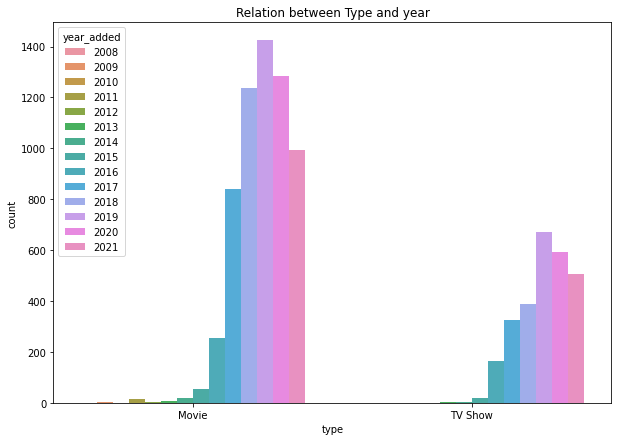

In [62]:
plt.figure(figsize=(10,7))
sb.countplot(x='type', hue = 'year_added', data = df)
plt.title('Relation between Type and year')
plt.show()

- In year 2019, highest movie and TV Show was added and after that there is a downfall, May be due to Covid

### Distplot

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\368058081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = df['release_year'])


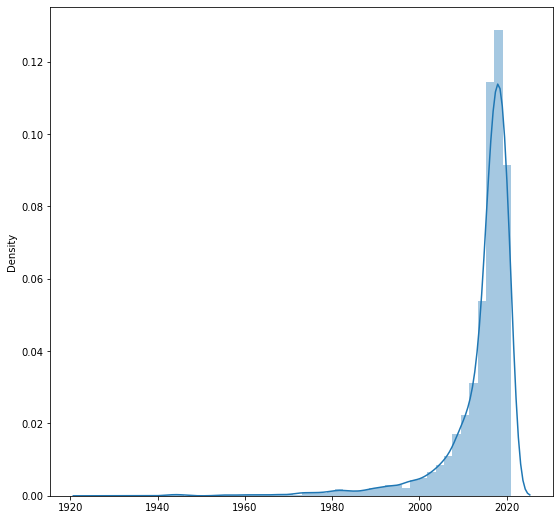

In [63]:
sb.distplot(x = df['release_year'])
fig.set_size_inches(10,10)

Text(0.5, 1.0, 'Duration')

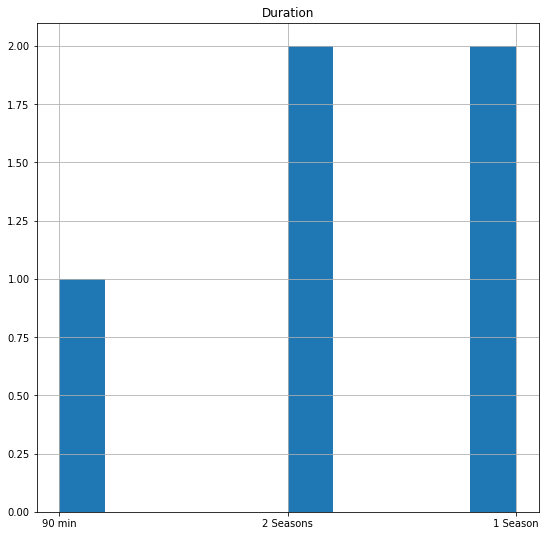

In [64]:
df['duration'].head().hist()
fig.set_size_inches(13,13)
plt.title('Duration')

### Top 5 countries with most number of Shows

In [65]:
z = df['country'].value_counts()
z

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

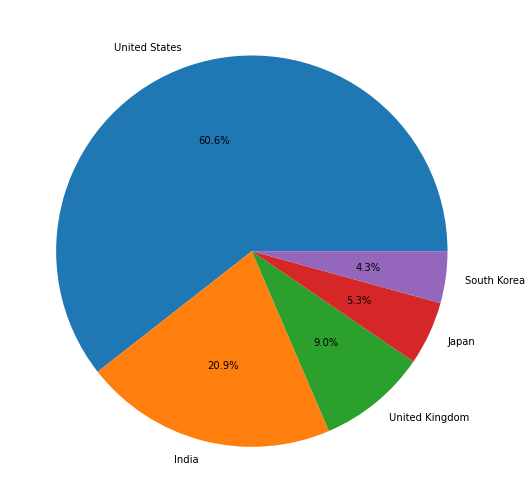

In [66]:
plt.pie(z.head().values, labels = z.head().index, autopct = '%1.1f%%')
plt.show()

- From above pie chart we can concluded that USA, INDIA, UK, JAPAN & SOUTH KOREA are the biggest market for netfilx

### Top 5 Rating Categories

In [67]:
y = df['rating'].value_counts()
y

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

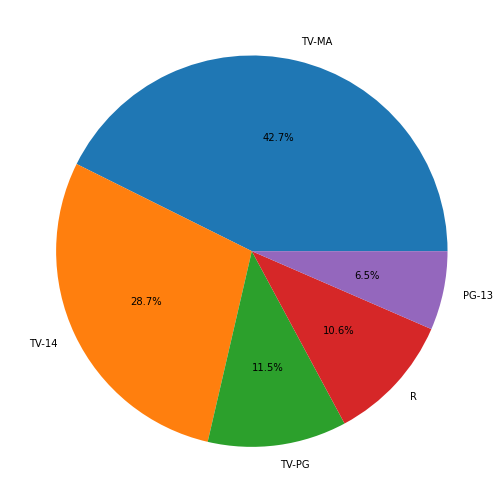

In [68]:
plt.pie(y.head().values, labels = y.head().index, autopct='%1.1f%%')
plt.show()

- Top 5 ratings are are visible

#### Top 5 directors by Movie counts

In [69]:
d = df['director'].value_counts()
d

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

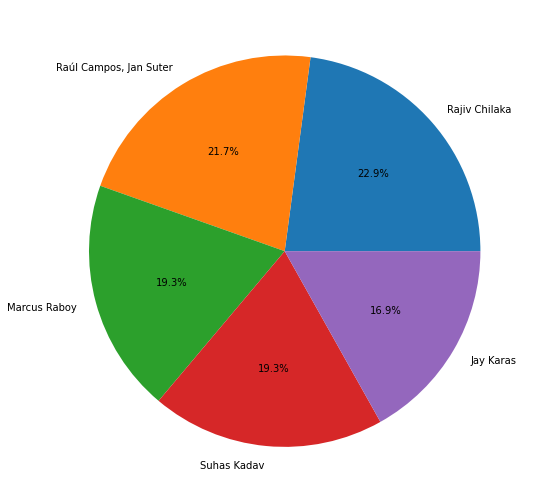

In [70]:
plt.pie(d.head().values, labels = d.head().index, autopct='%1.1f%%')
plt.show()

- Most number of directed movies are on Netfilx are directed by Rajiv Chilaka (As per Data Set)

### Bivariate Analysis
#### Release year of Moveis and TV Shows

Text(0.5, 1.0, 'Release year of Moveis and TV Shows')

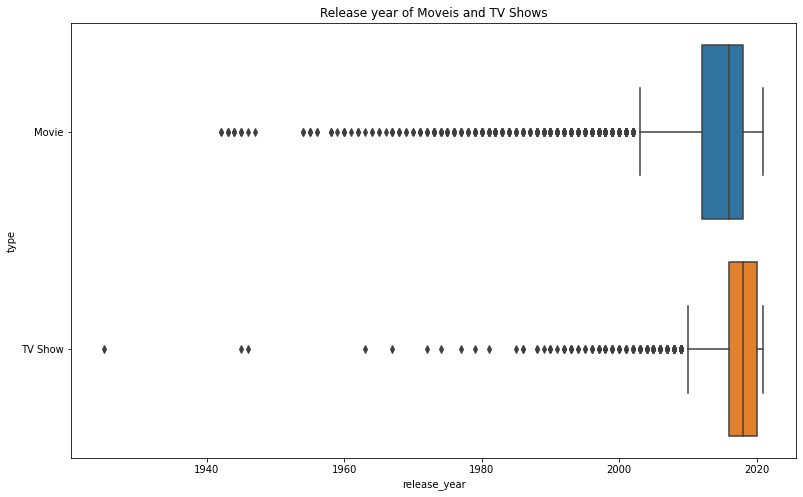

In [71]:
#Boxplot
boxplot = sb.boxplot(x = df['release_year'], y = df['type'])
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.title('Release year of Moveis and TV Shows')

In [72]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021


In [73]:
sb.__version__

'0.12.2'

### Heatmaps
#### Added Movies and TV Shows per year

Text(0.5, 1.0, 'Movies vs year_added Heatmap')

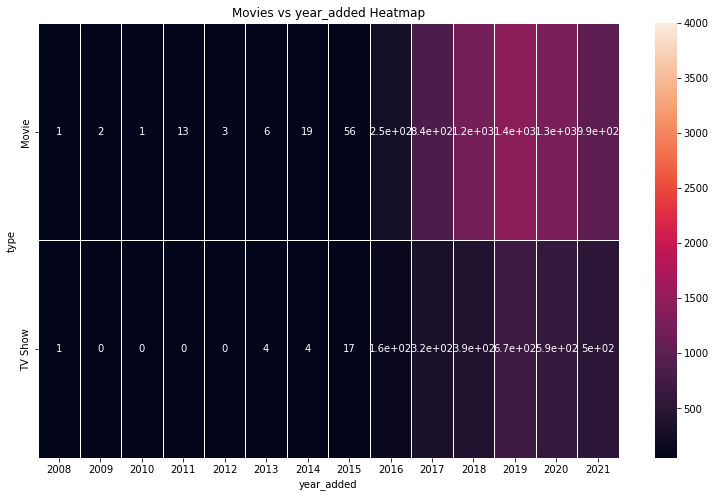

In [74]:
a = pd.crosstab(df['type'],df['year_added'])
sb.heatmap(a, annot = True, linewidth=0.5, vmin=50, vmax=4000)
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.title('Movies vs year_added Heatmap')

- Count of TV Shows and Movie varies from yeat to year

### Pairplots

Text(0.5, 1.0, 'Pair Plot of the DataFrame')

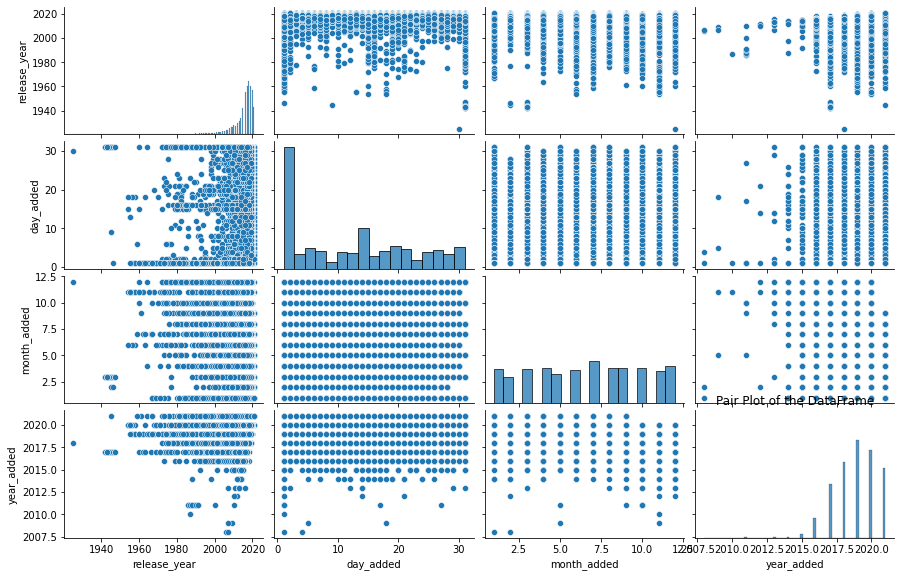

In [75]:
sb.pairplot(df)
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.title('Pair Plot of the DataFrame')

In [76]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021


### Working with Cast column

In [77]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021


In [78]:
constraint = df['cast'].apply(lambda x : str(x).split(', ')).tolist()

In [79]:
df_new = pd.DataFrame(constraint, index = df['title'])
df_new = df_new.stack()
df_new = pd.DataFrame(df_new)
df_new.reset_index(inplace=True) # reset index
df_new = df_new[['title', 0]] # consider only 2 column which is necessary
df_new.columns=['title', 'cast'] # Remaning last column with 'cast'
df_new[df_new['cast'] == 'Rupa Bhimani']

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani
3421,Chhota Bheem and the Incan Adventure,Rupa Bhimani


In [80]:
df_new.cast.value_counts().head()

cast
nan                 825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64

- Cast Group and their movie counts & there are 825 Null values

In [81]:
df_cast=df.reset_index().merge(df_new, on='title', how='inner')

In [82]:
df_cast[df_cast['cast_y']=='Anupam Kher']

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added,cast_y
1606,192,s193,Movie,C Kkompany,Sachin Yardi,"Mithun Chakraborty, Tusshar Kapoor, Anupam Khe...",India,2021-08-27,2008,TV-14,127 min,Three broke friends pose as an underworld gang...,27,8,2021,Anupam Kher
1704,202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,2021-08-27,2005,TV-MA,165 min,Longtime friends Rahul and Karan head to Mumba...,27,8,2021,Anupam Kher
1718,204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,2021-08-27,2012,TV-MA,136 min,An aspiring actor and a struggling DJ team up ...,27,8,2021,Anupam Kher
1728,205,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Sushmita Sen, Rambha, Anupam Kher, Sa...",India,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,27,8,2021,Anupam Kher
5985,702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,2021-06-17,2012,R,122 min,A man with bipolar disorder moves home with hi...,17,6,2021,Anupam Kher
15063,1861,s1862,Movie,Dil,Indra Kumar,"Aamir Khan, Madhuri Dixit, Saeed Jaffrey, Deve...",India,2020-10-12,1990,TV-14,165 min,A miser’s scheme to set his son up with a mill...,12,10,2020,Anupam Kher
18151,2270,s2271,Movie,Chashme Baddoor,David Dhawan,"Rishi Kapoor, Ali Zafar, Taapsee Pannu, Siddha...",India,2020-07-05,2013,TV-14,121 min,When pretty new neighbor Seema falls for their...,5,7,2020,Anupam Kher
18315,2289,s2290,Movie,Special 26,Neeraj Pandey,"Akshay Kumar, Manoj Bajpayee, Anupam Kher, Jim...",India,2020-07-05,2013,TV-PG,137 min,"In this fact-based crime drama, a gang of con ...",5,7,2020,Anupam Kher
18650,2339,s2340,Movie,Prem Ratan Dhan Payo,Sooraj R. Barjatya,"Salman Khan, Sonam Kapoor, Anupam Kher, Neil N...",India,2020-06-25,2015,TV-14,164 min,While recovering from an assassination attempt...,25,6,2020,Anupam Kher
18662,2340,s2341,Movie,Vivah,Sooraj R. Barjatya,"Shahid Kapoor, Amrita Rao, Anupam Kher, Alok N...",India,2020-06-25,2006,TV-14,166 min,"Set up for an arranged marriage, a young coupl...",25,6,2020,Anupam Kher


In [83]:
x=pd.DataFrame(df_cast.groupby('cast_y')['title'].count())

In [84]:
x.reset_index(inplace=True)

In [85]:
x[x['cast_y']=='Anupam Kher']

,cast_y,title
2833,Anupam Kher,43


- Total Movie count of Anupam Kher

5. Missing Value & Outlier check

In [86]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021


In [87]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
description        0
day_added          0
month_added        0
year_added         0
dtype: int64

In [88]:
# Using mode function we are working on missing values
mode_value = df['director'].mode()[0]

In [89]:
df['director'].fillna(mode_value, inplace = True)

In [90]:
df['country'].fillna(df['country'].mode()[0], inplace = True)
df['cast'].fillna(df['cast'].mode()[0], inplace = True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace = True)
df['rating'].fillna(df['rating'].mode()[0], inplace = True)


In [91]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,24,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"A political cartoonist, a crime reporter and a...",20,11,2019
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",1,7,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Looking to survive in a world taken over by zo...,1,11,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",11,1,2020


In [92]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

In [93]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8804,8807,8807.000000,8807.000000,8807.000000
unique,8807,2,8807,4528,7692,748,NaN,NaN,17,220,8775,NaN,NaN,NaN
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,NaN,NaN,TV-MA,1 Season,"Paranormal activity at a lush, abandoned prope...",NaN,NaN,NaN
freq,1,6131,1,2653,844,3649,NaN,NaN,3211,1793,4,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-25 13:17:35.024412160,2014.180198,NaN,NaN,NaN,12.383218,6.657204,2018.889179
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,1.000000,1.000000,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-30 12:00:00,2013.000000,NaN,NaN,NaN,1.000000,4.000000,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-26 00:00:00,2017.000000,NaN,NaN,NaN,12.000000,7.000000,2019.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-18 00:00:00,2019.000000,NaN,NaN,NaN,20.000000,10.000000,2020.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,31.000000,12.000000,2021.000000


- Here let assume, for TV shows 1 season is equals to 60 minute

In [94]:
df['duration']=df['duration'].apply(lambda x:str(x).split(' ')[0])

In [95]:
for i in range(len(df)):
    if df['type'][i]=='TV Show':
        df['duration'][i]=int(df['duration'][i])*60

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int(df['duration'][i])*60
C:\Users\Deep\AppData\Local\Temp\ipykernel_6944\146563206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=int

In [96]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,120,"After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,60,To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,60,"Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,120,In a city of coaching centers known to train I...,24,9,2021


- We have convert duration into minute format

In [97]:
df['duration'].fillna(df['duration'].mode()[0], inplace = True)
df['duration']

0        90
1       120
2        60
3        60
4       120
       ... 
8802    158
8803    120
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: object

In [98]:
df['duration'].isnull().sum()
df['duration'].dtype

dtype('O')

In [99]:
# print(np.where(df['duration']>200))

# # Q1 = df.price.quantile(0.25)
# # Q3 = df.price.quantile(0.75)
# # IQR = Q3-Q1
# # df_final = df[~((df.price<(Q1-1.5*IQR)) | (df.price>(Q3+1.5*IQR)))]

In [100]:
# Convert 'duration' column to numeric data type

df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

In [101]:
df['duration'].dtype

dtype('float64')

In [102]:
# Calculate Z-score
z_score = (df['duration']-df['duration'].mean())/df['duration'].std()
z_score

0      -0.199975
1       0.321787
2      -0.721738
3      -0.721738
4       0.321787
          ...   
8802    0.982686
8803    0.321787
8804   -0.234759
8805   -0.234759
8806    0.165258
Name: duration, Length: 8807, dtype: float64

In [103]:
# Identify outliers using z-score
outliers_zscore = np.where(np.abs(z_score)>3)
outliers_zscore

(array([   8,   21,   55,   65,   67,   72,   82,  106,  109,  254,  272,
         274,  323,  336,  338,  380,  390,  425,  514,  521,  525,  526,
         537,  544,  548,  631,  667,  669,  677,  789, 1043, 1059, 1173,
        1245, 1354, 1362, 1408, 1427, 1480, 1622, 1639, 1701, 1750, 1759,
        1779, 1851, 1878, 1922, 1933, 1980, 1998, 2009, 2021, 2073, 2124,
        2160, 2173, 2201, 2203, 2293, 2390, 2405, 2422, 2423, 2470, 2515,
        2523, 2526, 2599, 2600, 2658, 2718, 2740, 2947, 2962, 2994, 3108,
        3168, 3247, 3369, 3452, 3477, 3541, 3601, 3608, 3653, 3749, 3774,
        3886, 3927, 3943, 4084, 4163, 4220, 4253, 4264, 4311, 4413, 4504,
        4709, 4747, 4798, 4845, 4946, 4964, 5035, 5054, 5063, 5090, 5096,
        5138, 5165, 5180, 5221, 5245, 5274, 5287, 5320, 5363, 5412, 5421,
        5650, 5674, 5803, 5908, 5923, 5940, 6126, 6174, 6250, 6456, 6504,
        6505, 6506, 6519, 6549, 6603, 6742, 6795, 6806, 6885, 6941, 6955,
        6970, 7342, 7368, 7628, 7709, 

In [104]:
# Calculate IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

IQR = Q3 - Q1

In [105]:
# Identify outlier using IQR

outliers_IQR = np.where((df['duration'] < Q1 - 1.5*IQR) | (df['duration']> Q3 + 1.5*IQR))
outliers_IQR

(array([   8,   15,   21,   55,   65,   67,   72,   82,   89,  106,  109,
         160,  166,  220,  254,  272,  274,  323,  336,  338,  380,  386,
         390,  391,  425,  477,  512,  514,  521,  525,  526,  537,  540,
         544,  548,  628,  631,  660,  661,  667,  669,  676,  677,  684,
         717,  789,  807,  890, 1019, 1043, 1059, 1081, 1158, 1173, 1179,
        1235, 1245, 1302, 1308, 1354, 1362, 1377, 1395, 1401, 1408, 1419,
        1427, 1473, 1480, 1569, 1590, 1618, 1622, 1639, 1687, 1698, 1701,
        1750, 1759, 1765, 1779, 1781, 1791, 1847, 1848, 1851, 1878, 1922,
        1929, 1933, 1948, 1949, 1958, 1980, 1998, 2009, 2021, 2069, 2073,
        2124, 2127, 2135, 2160, 2173, 2201, 2203, 2254, 2293, 2388, 2390,
        2395, 2399, 2405, 2415, 2417, 2422, 2423, 2466, 2470, 2484, 2487,
        2488, 2491, 2515, 2523, 2526, 2583, 2599, 2600, 2628, 2632, 2658,
        2718, 2731, 2740, 2790, 2846, 2931, 2947, 2962, 2994, 3011, 3035,
        3108, 3168, 3192, 3227, 3247, 

In [106]:
# Print indeces of value greater than 200
print(np.where(df['duration']>200))

(array([   8,   15,   21,   55,   65,   67,   72,   82,   89,  106,  109,
        160,  166,  220,  254,  272,  274,  323,  336,  338,  380,  386,
        390,  391,  425,  477,  512,  514,  521,  525,  526,  537,  540,
        544,  548,  628,  631,  660,  661,  667,  669,  676,  677,  684,
        717,  789,  806,  807,  890, 1019, 1043, 1059, 1081, 1158, 1173,
       1179, 1235, 1245, 1302, 1308, 1354, 1362, 1377, 1395, 1401, 1408,
       1419, 1427, 1473, 1480, 1569, 1590, 1618, 1622, 1639, 1687, 1698,
       1701, 1750, 1759, 1765, 1779, 1781, 1791, 1847, 1848, 1851, 1878,
       1922, 1929, 1933, 1948, 1949, 1958, 1980, 1998, 2009, 2021, 2069,
       2073, 2124, 2126, 2127, 2135, 2160, 2173, 2201, 2203, 2254, 2293,
       2388, 2390, 2395, 2399, 2405, 2415, 2417, 2422, 2423, 2466, 2470,
       2483, 2484, 2487, 2488, 2491, 2515, 2523, 2526, 2583, 2599, 2600,
       2628, 2632, 2658, 2718, 2731, 2740, 2790, 2846, 2931, 2947, 2962,
       2994, 3011, 3035, 3108, 3168, 3192, 3227, 3

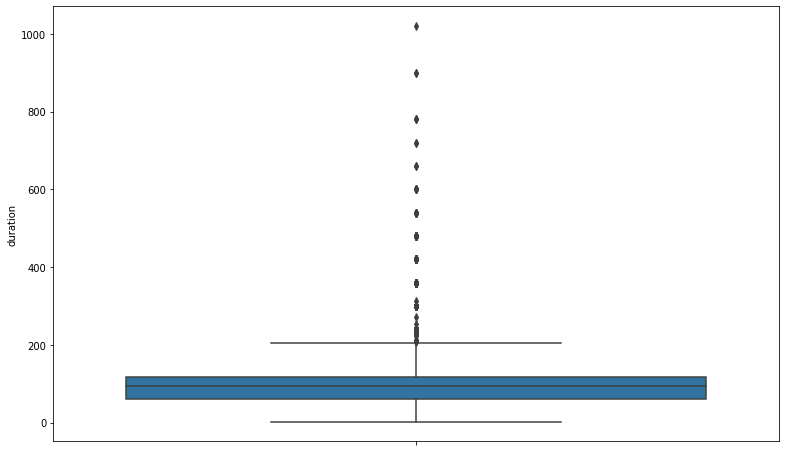

In [107]:
# Box Plot

boxplot = sb.boxplot(data = df, y = 'duration')

fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

- IQR and Z-Score results along with Boxplot is visible

###### Business Insights

- As per Dataset most of the movies & TV Shows are directed by Rajiv Chilaka(19) followed by Raúl Campos and Jan Suter (18 each)
- Netflix started adding more and more TV Shows as the demand for the same is growing
- After 2019 there is a dip in the count of Movies and TV Shows, which may be the COVID effect
- Most directed movies on Netflix are directed by Rajiv Chilaka (As per Data Set)
- Highest percentile rating is for TV-MA
- The most number of Movies and TV Shows available in the US followed by INDIA
- Top 5 Genre is already analyzed, International Movies genre contains the highest number of Movies/TV Shows, i.e. 2624
- Estimate duration of any Show is around 200 minutes mostly
- August is the Month when most Movies/TV Shows are added to Netflix, followed by December and September

###### Recommendations

- As the popularity of TV Shows increases, Netflix should focus on TV Shows as well. This step can help Netflix to increase its user base
- India is the second largest user base for Netflix, Netflix should focus on more such content which can work efficiently in India
- Netflix should focus on the Comedy, Action & Adventure genres as these genres have great potential and are currently in a growing state (On Netflix's platform)
- After Covid Period, i.e. after 2020, Netflix should focus on increasing the number of contents
